# Proyek Predictive Analysis: Bank Customer Churn
- **Nama:** Meilani Kizana
- **Email:** meilanikizana@gmail.com
- **ID Dicoding:** Meilani Kizana

## Import Library

Tahapan ini merupakan tahap untuk melakukan import semua library yang akan digunakan selama proyek.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Data Loading

Tahapan ini merupakan tahap untuk mengunggah data (csv) dan menyimpannya ke dataframe.

In [50]:
df = pd.read_csv("Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [51]:
# Menyimpan data asli ke df_ori
df_ori = df.copy()

Dari tahapan ini, dapat diketahui bahwa data terdiri dari 10.000 baris data dengan total 18 kolom.

## Exploratory Data Analysis (EDA)

Tahapan ini merupakan tahap ekplorasi data untuk dapat memahami data dengan lebih baik dan mampu mengetahui hubungan antar fitur-fitur.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Tahapan diatas menjelaskan total kolom yang terdapat dalam data beserta dengan jumlah data dan tipe datanya. Terdapat 2 fitur dengan tipe data float64, 12 fitur dengan tipe data int64, dan 4 fitur dengan tipe data object. Selain itu, semua kolom terdiri dari jumlah data yang sama yaitu 10.000.

In [53]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Tahapan diatas menjelaskan statistik deskriptif dari kolom-kolom numerikal yang terdapat pada data. Dari hasil yang diperoleh, dapat diketahui bahwa tidak ada nilai yang tidak sesuai dengan logika bisnis. Semua nilai berada dalam rentang yang sesuai dan masuk akal dengan logika bisnis.

In [54]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Tahapan diatas digunakan untuk mencari tahu apakah terdapat nilai null dalam masing-masing kolom. Hasil yang diperoleh yaitu tidak terdapat nilai null di semua kolom.

In [55]:
df.duplicated().sum()

np.int64(0)

Tahap diatas digunakan untuk mencari tahu apakah terdapat data yang terduplikasi. Hasilnya menunjukkan bahwa tidak ada data duplikat dalam data yang digunakan.

### Univariate Analysis

Tahapan ini merupakan tahap untuk melakukan analisis terhadap masing-masing kolom (fitur).

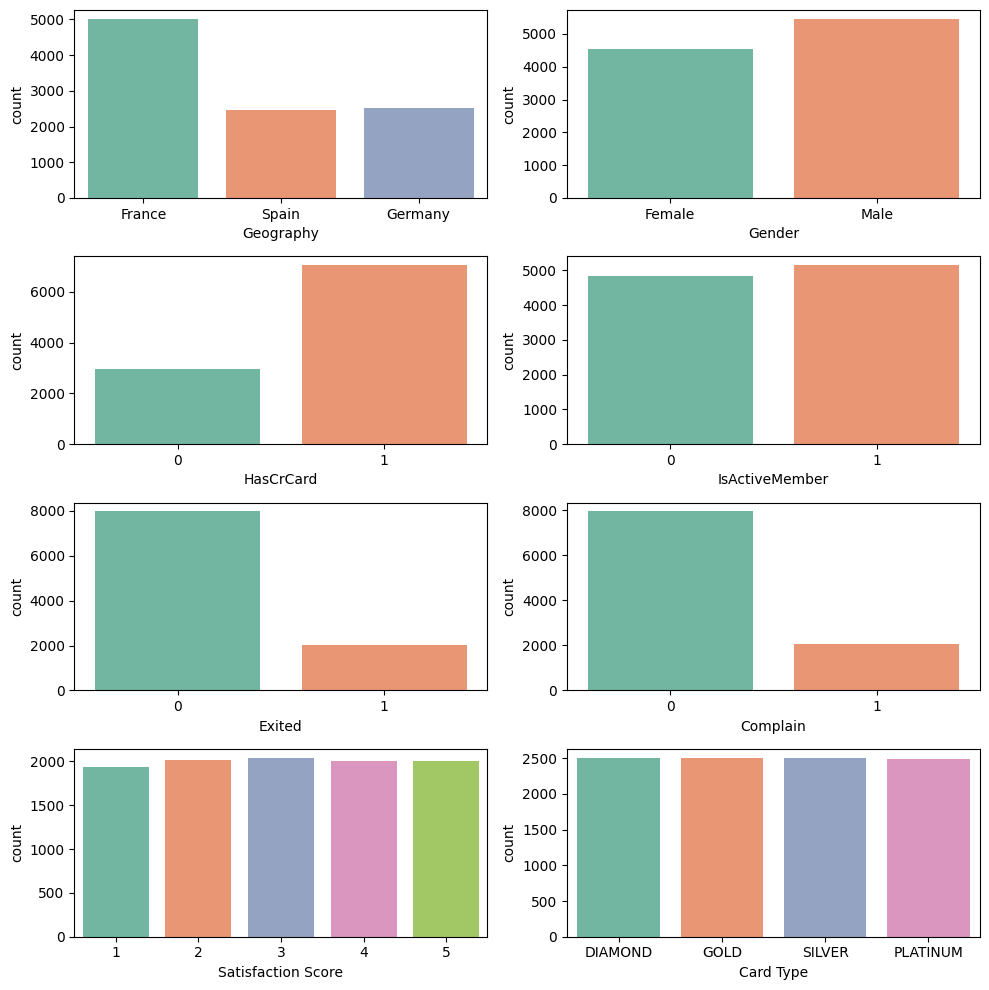

In [56]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember',
                        'Exited', 'Complain', 'Satisfaction Score', 'Card Type']

fig, axes = plt.subplots(4, 2, figsize=(10, 10))
for i, feature in enumerate(categorical_features):
    ax = axes[i // 2, i % 2]
    sns.countplot(ax=ax, data=df, x=feature, hue=feature, palette='Set2', legend=False)

plt.tight_layout()
plt.show()

Dari hasil diatas, berikut ini beberapa hal yang dapat diketahui:
- Nasabah bank yang didata berasal dari 3 negara yaitu sekitar 50% dari Prancis serta masing-masing 25% dari Spanyol dan German.
- Perbandingan nasabah perempuan dan laki-laki cukup seimbang, dengan lebih kurang 4.500 nasabah perempuan dan lebih kurang 5.500 nasabah laki-laki.
- Sekitar 70% nasabah memiliki kartu kredit, sedangkan sisanya tidak memiliki kartu kredit. Hal ini berarti data yang dimiliki didominasi oleh nasabah yang memiliki kartu kredit.
- Perbandingan nasabah aktif dengan nasabah tidak aktif hampir seimbang.
- Perbandingan nasabah yang meninggalkan bank berada di perbandingan 80:20. Dengan 80% tidak meninggalkan bank dan 20% meninggalkan bank.
- Perbandingan nasabah yang melakukan komplain berada di perbandingan 80:20. Dengan 80% tidak tidak memiliki komplain, dan 20% memiliki komplain.
- Adapun jumlah skor kepuasan pengguna untuk penyelesaian keluhan atau komplain mereka tersebar cukup merata dari skor 1 hingga 5.
- Tipe kartu terbagi menjadi 4 jenis yaitu Diamond, Silver, Gold, dan Platinum. Adapun yng terdapat pada data ini tersebar cukup merata pada keempat tipe kartu tersebut.

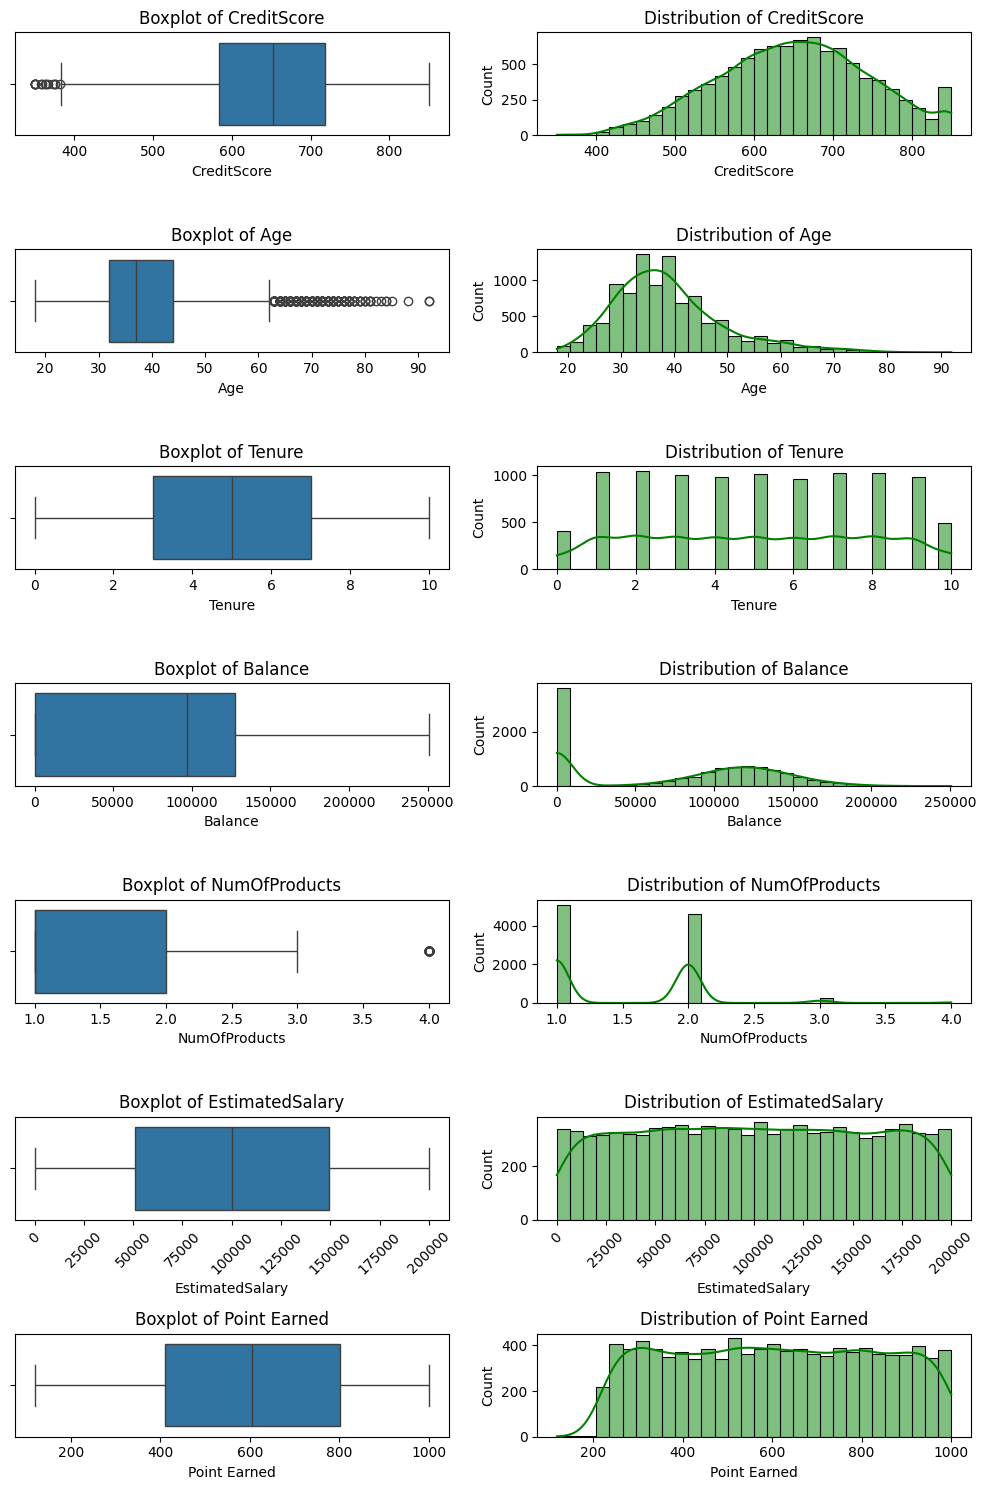

In [57]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                      'EstimatedSalary', 'Point Earned']

fig, axes = plt.subplots(7, 2, figsize=(10, 15))
for i, feature in enumerate(numerical_features):
    sns.boxplot(ax=axes[i, 0], x=df[feature])
    axes[i, 0].set_title(f'Boxplot of {feature}')
    if feature == 'EstimatedSalary':
      axes[i, 0].tick_params(axis='x', rotation=45)

    sns.histplot(ax=axes[i, 1], x=df[feature], data=df, bins=30, kde=True, color="green")
    axes[i, 1].set_title(f'Distribution of {feature}')
    if feature == 'EstimatedSalary':
      axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Dari hasil diatas, berikut ini beberapa hal yang dapat diketahui:
- Nilai CreditScore sebagian besar berada antara 550 hingga 750. Terdapat outlier dengan skor sangat rendah di bawah 400. Distribusi bersifat mendekati normal dengan sedikit skew ke kiri.
- Usia nasabah berkisar dari 18 hingga lebih dari 90 tahun, yang cenderung terpusat pada rentang usia 30–40 tahun. Adapun usia nasabah yang lebih dari 60 tahun terdeteksi sebagai outlier. Namun hal ini dibiarkan karena usia tersebut masih masuk akal sebagai nasabah sebuah bank.
- Lama menjadi nasabah cukup terdistribusi secara merata antara 0 hingga 10 tahun, hal ini menunjukkan bahwa tidak ada durasi tertentu yang dominan bagi nasabah.
- Saldo nasabah tersebar cukup beragam, dengan saldo 0 yang mendominasi, kemudian sisanya terdistribusi pada saldo 5.000 hingga 20.000, serta terdapat juga nasabah dengan saldo hingga 25.000. Hal ini menunjukkan bahwa mayoritas nasabah memiliki saldo kecil atau 0, dilihat dari persebarannya yang cenderung ke kiri.
- Sebagian besar nasabah membeli 1 atau 2 produk. Adapun nasabah yang membeli 3 hingga 4 produk, namun jumlah nasabah yang membeli 4 produk relatif sedikit sehingga terdeteksi sebagai outlier. Namun hal ini masih normal dan masuk akal sehingga dapat dibiarkan.
- Estimasi gaji nasabah tersebar merata dari 0 hingga 200.000. Distribusi ini tampak seragam tanpa adanya outlier.
- Poin yang diperoleh nasabah tersebar cukup merata antara 100 hingga 1000, dengan konsentrasi di sekitar nilai 600.

### Multivariate Analysis

Tahapan ini merupakan tahap untuk melakukan analisis hubungan antar dua kolom (fitur), terutama fitur target dengan fitur lainnya. Hal ini dilakukan agar dapat mengetahui fitur yang memiliki hubungan/dampak besar terhadap target.

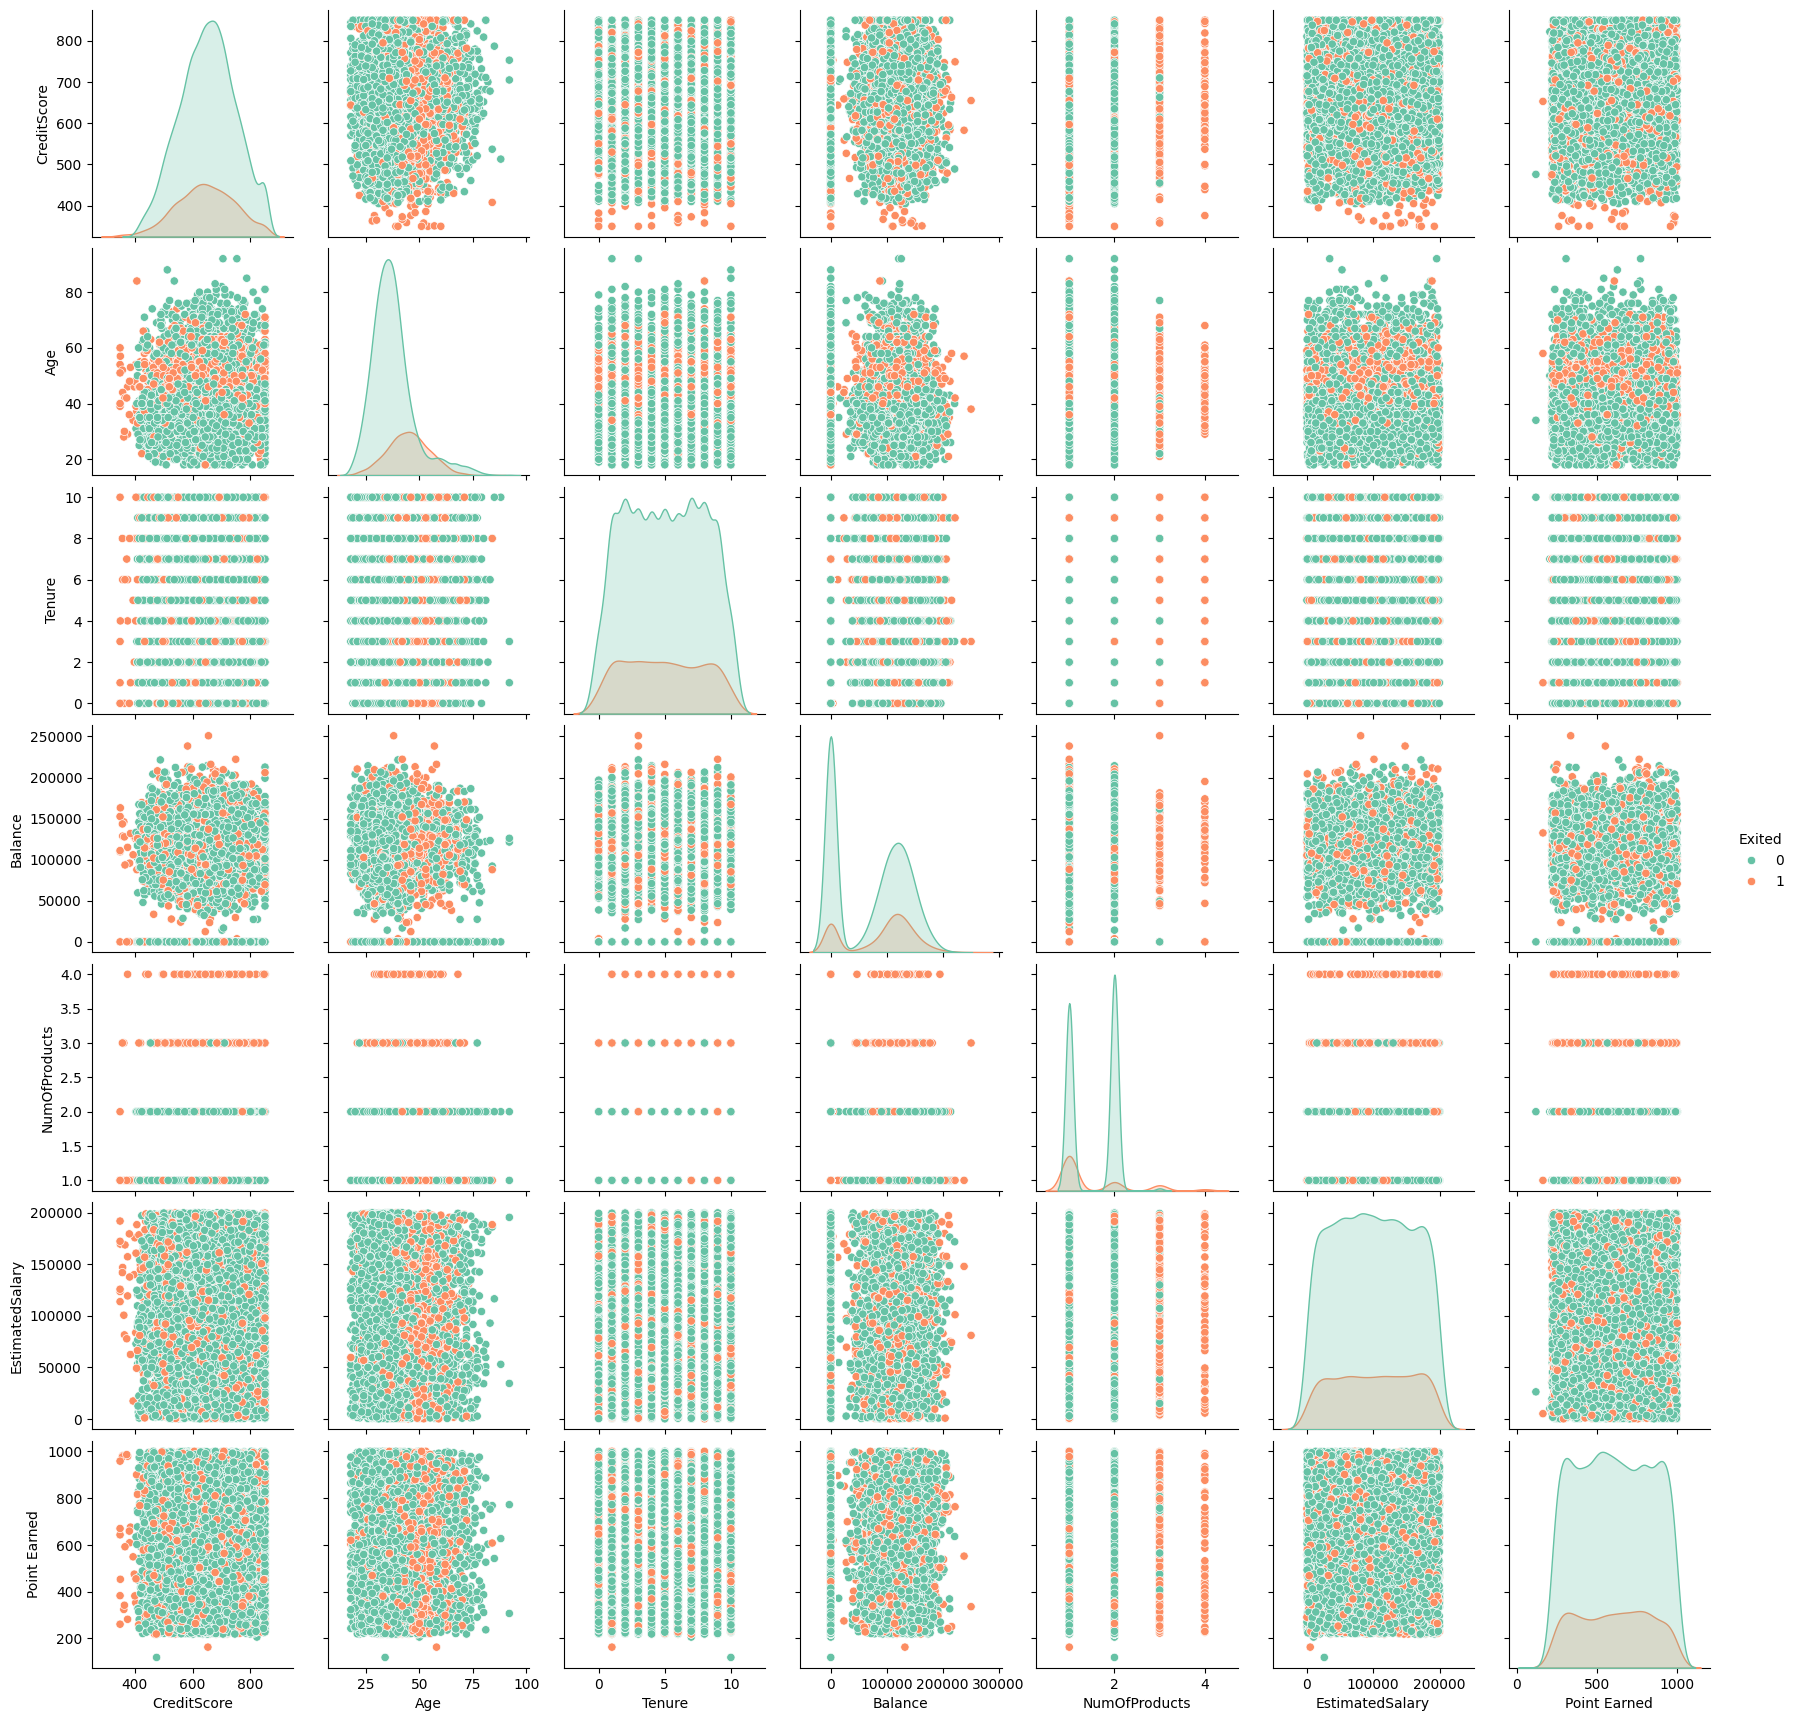

In [58]:
sns.pairplot(df[numerical_features + ['Exited']], kind='scatter', diag_kind = 'kde', hue='Exited', palette='Set2')

Dari hasil analisis hubungan antar fitur numerikal diatas, dapat diketahui bahwa tidak terdapat hubungan yang linear atau cukup signifikan terhadap nasabah yang meninggalkan bank atau tidak. Hal ini menunjukkan bahwa fitur-fitur memiliki hubungan yang cukup kompleks atau non-linear.

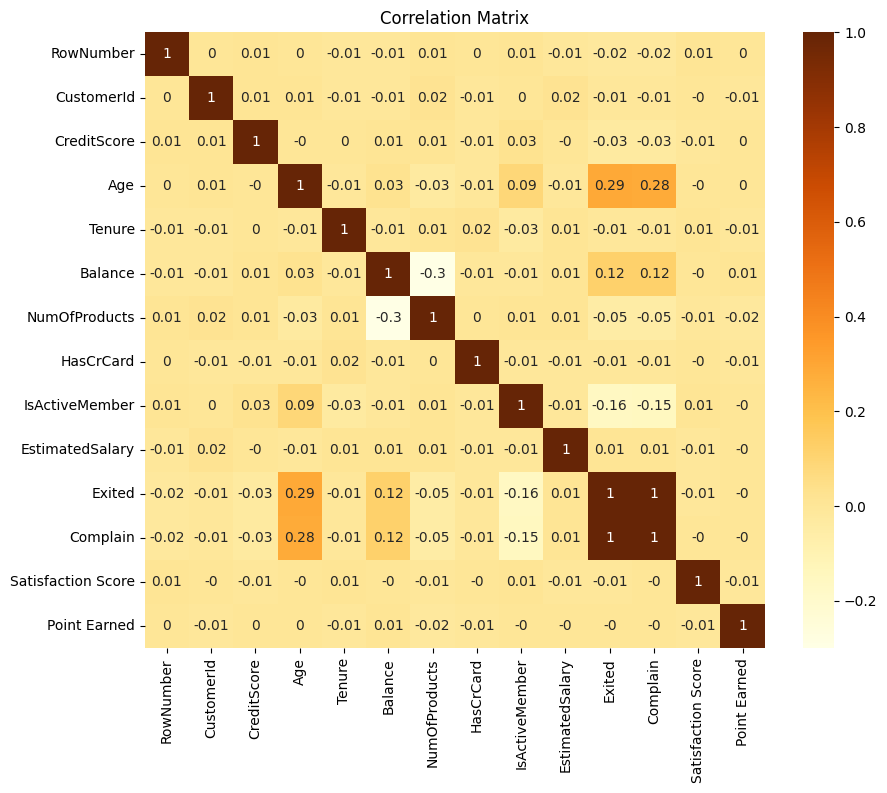

In [59]:
corr = df.corr(numeric_only = True).round(2)

plt.figure(figsize= (10, 8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot= True, cmap = 'YlOrBr', cbar= True)
plt.show()

Heatmap diatas digunakan untuk mencari hubungan atau tingkat korelasi antar fitur-fitur numerikal. Hal yang perlu diperhatikan adalah hubungan antar fitur yang memiliki korelasi positif atau cukup kuat terutama terhadap fitur yang akan menjadi target yaitu 'Exited'.

<Axes: >

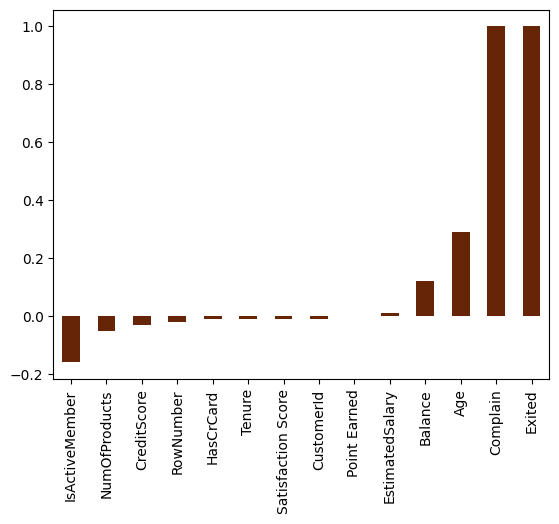

In [60]:
corr['Exited'].sort_values().plot(kind='bar', color='#662506')

Untuk dapat lebih mudah dalam mengetahui fitur yang memiliki korelasi atau dampak terhadap fitur target, maka dibuatkan bar seperti diatas. Hasil dari bar tersebut menunjukkan bahwa fitur yang memiliki korelasi positif mulai dari yang paling tinggi tingkat korelasinya adalah fitur 'Complain', fitur 'Age', fitur 'Balance', dan fitur 'EstimatedSalary'. Adapun untuk fitur 'Complain' memiliki korelasi yang sangat tinggi, artinya hampir setiap nasabah yang melakukan komplain, memilih untuk meninggalkan bank. Begitupun sebaliknya, dimana nasabah yang tidak melakukan komplain, mayoritas akan tetap di bank.

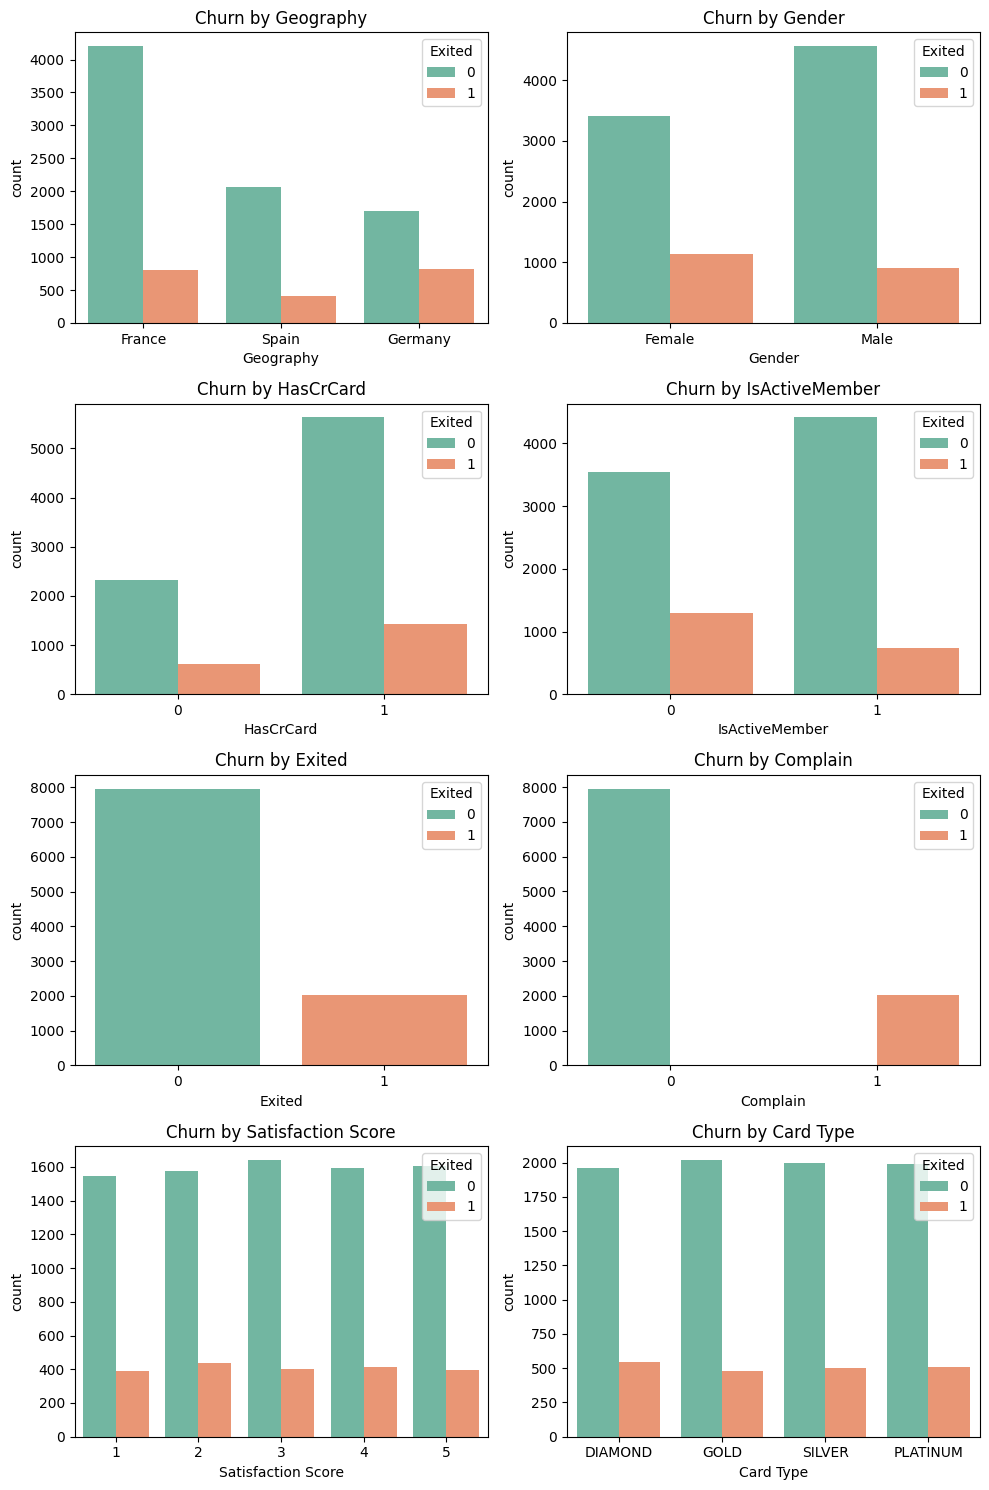

In [61]:
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

for i, feature in enumerate(categorical_features):
  ax = axes[i // 2, i % 2]
  sns.countplot(ax=ax, data = df, x= feature, hue = 'Exited', palette = 'Set2')
  ax.set_title(f'Churn by {feature}')

plt.tight_layout()
plt.show()

In [62]:
for feature in categorical_features:
  churn_rate = df.groupby(feature)['Exited'].mean() * 100
  print(f"Churn rate by {feature}:\n{churn_rate}\n")

Churn rate by Geography:
Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

Churn rate by Gender:
Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64

Churn rate by HasCrCard:
HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64

Churn rate by IsActiveMember:
IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64

Churn rate by Exited:
Exited
0      0.0
1    100.0
Name: Exited, dtype: float64

Churn rate by Complain:
Complain
0     0.050277
1    99.510763
Name: Exited, dtype: float64

Churn rate by Satisfaction Score:
Satisfaction Score
1    20.031056
2    21.797418
3    19.637610
4    20.617530
5    19.810379
Name: Exited, dtype: float64

Churn rate by Card Type:
Card Type
DIAMOND     21.779019
GOLD        19.264588
PLATINUM    20.360721
SILVER      20.112179
Name: Exited, dtype: float64



Kedua tahap diatas digunakan untuk mengetahui bagaimana hubungan antara fitur kategorikal dengan fitur target 'Exited' dengan cara melihat perbandingan nasabah yang memilih meninggalkan bank dengan nasabah yang tetap di bank. Dari hasil tersebut menunjukkan persentase yang cukup seragam antara 15-30% pengguna melakukan churn atau meninggalkan bank. Namun pada fitur 'Complain', persentase nasabah yang meninggalkan bank sangat tinggi yaitu 99% pada pelanggan yang memiliki komplain. Hal ini menunjukkan hampir semua nasabah yang memiliki komplain, memilih untuk meninggalkan bank. Sedangkan untuk negara, German perlu diperhatikan karena memiliki persentase yang cukup tinggi dibandingkan dengan 2 negara lainnya yaitu 32% sedangkan 2 negara lainnya berada di 16%.  

## Data Preparation

Tahapan ini merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap modelling. Tahap ini terdiri encoding fitur kategorikal, eliminasi fitur yang tidak penting, pembagian dataset train dan test, serta standarisasi. Umumnya terdapat juga tahapan untuk menangani outlier, nilai null, dan data duplikat. Namun dalam data kali ini, tidak terdapat outlier yang harus ditangani. Serta dari tahap EDA sebelumnya dapat diketahui bahwa tidak terdapat nilai null maupun data duplikat yang harus ditangani.

In [63]:
onehot_encoder = OneHotEncoder(sparse_output=False)

encoded_geography = onehot_encoder.fit_transform(df[['Geography', 'Gender', 'Card Type']])
encoded_df = pd.DataFrame(encoded_geography, columns=onehot_encoder.get_feature_names_out(['Geography', 'Gender', 'Card Type']))
df = pd.concat([df, encoded_df], axis=1)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,464,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,456,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,377,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,350,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,425,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Tahapan diatas digunakan untuk melakukan one hot encoding pada fitur kategorikal yang belum dilakukan encoding yaitu fitur 'Geography', 'Gender', dan 'Card Type'.

In [64]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Card Type'], inplace=True, axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Tahapan diatas digunakan untuk menghapus (drop) kolom yang tidak penting atau tidak lagi diperlukan. Kolom 'RowNumber', 'CustomerId', dan 'Surname' dihapus karena tidak memberikan insight apapun terhadap proses klasifikasi dan hanya merupakan kolom identitas. Sedangkan kolom 'Geography', 'Gender', dan 'Card Type' dihapus karena telah dilakukan one hot encoding yang menghasilkan kolom baru yang bertipe numerikal, sehingga kolom ini harus dihapuskan agar tidak terjadi duplikasi.

In [65]:
X = df.drop(["Exited"], axis =1)
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Tahapan diatas digunakan untuk memisahkan kolom fitur dengan kolom target serta membagi data menjadi 2 yaitu data pelatihan dan data uji. Target pada klasifikasi ini adalah kolom 'Exited' sehingga kolom tersebut dipisahkan dan disimpan dalam variabel y, sedangkan kolom lainnya disimpan dalam variabel X. Adapun pembagian data pelatihan dan data uji yanng digunakan disini adalah 80% data pelatihan dan 20% data uji.

In [66]:
print(f'Total seluruh dataset: {len(X)}')
print(f'Total dataset pelatihan: {len(X_train)}')
print(f'Total dataset pengujian: {len(X_test)}')

Total seluruh dataset: 10000
Total dataset pelatihan: 8000
Total dataset pengujian: 2000


In [67]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,1.367670,-0.430193
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,1.661254,1.565908
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,-0.252807,-1.243749
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.915393,-0.176791
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.059600,0.534515


Tahapan diatas digunakan untuk melakukan standardisasi terhadap fitur-fitur numerikal yang akan digunakan dalam pembangunan model. Standardisasi yang digunakan adalah StandardScaler.

## Model Development

Tahapan ini merupakan tahap pembangunan model dengan algoritma yang dipilih. Pada proyek ini, saya menggunakan 3 algoritma untuk klasifikasi yaitu K-Nearest Neighbor, Random Forest, dan Logistic Regression.

In [68]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

RF = RandomForestClassifier(n_estimators=25, max_depth=3, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

LR = LogisticRegression()
LR.fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


## Evaluasi Model

Tahapan ini merupakan tahap dimana model yang telah dilatih akan dievaluasi menggunakan data uji untuk mengetahui kinerja dari model. Metrik evaluasi yang digunakan terdiri dari 4 yaitu akurasi, presisi, recall, dan f1 score. Selain itu, saya juga menggunakan confusion matrix untuk melihat hasil dari klasifikasi yang dilakukan oleh model.

==== K-Nearest Neighbor Classifier ====
Accuracy: 0.6975
Precision: 0.6989
Recall: 0.6975
F1-Score: 0.6982


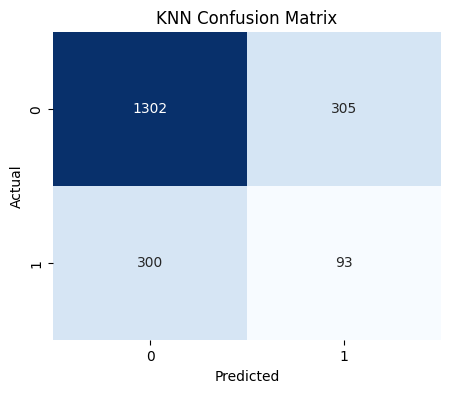

In [69]:
# Melakukan prediksi dengan data uji menggunakan algoritma KNN
y_pred_knn = knn.predict(X_test)

evaluation_results = {}

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

evaluation_results['K-Nearest Neighbor'] = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn
}

# Menampilkan hasil metrik evaluasi kinerja algoritma KNN dengan accuracy, precision, recall, dan F1-score
print("==== K-Nearest Neighbor Classifier ====")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")

# Menampilkan confusion matrix untuk melihat detail prediksi benar dan salah
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Accuracy: 0.9990
Precision: 0.9990
Recall: 0.9990
F1-Score: 0.9990


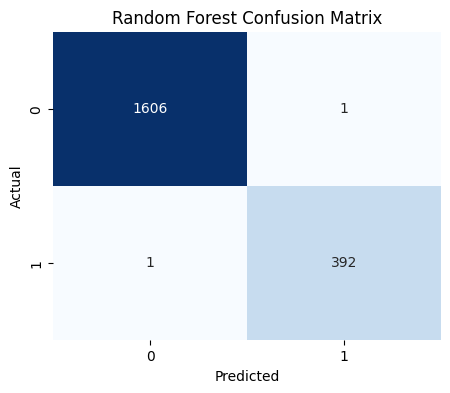

In [70]:
# Melakukan prediksi dengan data uji menggunakan algoritma Random Forest
y_pred_rf = RF.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

evaluation_results['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf
}

# Menampilkan hasil metrik evaluasi kinerja algoritma Random Forest dengan accuracy, precision, recall, dan F1-score
print("==== Random Forest Classifier ====")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Menampilkan confusion matrix untuk melihat detail prediksi benar dan salah
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Logistic Regression Classifier ====
Accuracy: 0.4910
Precision: 0.7269
Recall: 0.4910
F1-Score: 0.5372


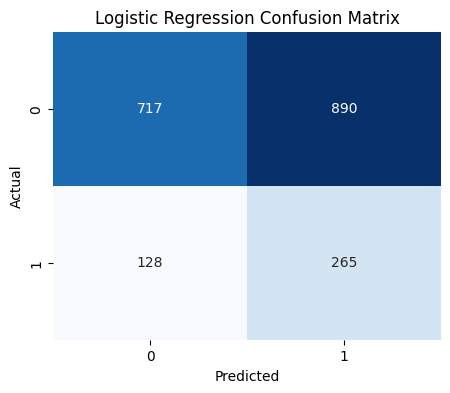

In [71]:
# Melakukan prediksi dengan data uji menggunakan algoritma Logistic Regression
y_pred_lr = LR.predict(X_test)

accuracy_lr= accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

evaluation_results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr
}

# Menampilkan hasil metrik evaluasi kinerja algoritma Logistic Regression dengan accuracy, precision, recall, dan F1-score
print("==== Logistic Regression Classifier ====")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

# Menampilkan confusion matrix untuk melihat detail prediksi benar dan salah
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
# Membandingkan hasil evaluasi algoritma KNN dan RF
evaluation_summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in evaluation_results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

evaluation_summary_df = pd.DataFrame(rows)
evaluation_summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbor,0.6975,0.698948,0.6975,0.698220
1,Random Forest,0.9990,0.999000,0.9990,0.999000
2,Logistic Regression,0.4910,0.726871,0.4910,0.537187


Dari hasil evaluasi diatas, dapat diketahui beberapa hal berikut:
- Random Forest menunjukkan performa terbaik di keempat metrik evaluasi. Hal ini menunjukkan bahwa Random Forest cocok untuk digunakan dalam kasus ini.
- K-Nearest Neighbor atau KNN memiliki performa rata-rata 69% di keempat metrik. Hal ini menunjukkan performa yang cukup baik namun masih kurang kuat untuk digunakan dalam kasus ini.
- Logistic Regression memiliki performa yang paling rendah jika dibandingkan dengan algoritma lainnya. Hal ini menunjukkan bahwa algoritma ini tidak cocok untuk digunakan dalam kasus ini. Walaupun nilai presisi cukup tinggi, namun nilai pada akurasi, recall, dan f1 score cenderung rendah.

Maka sebagai kesimpulan, model yang cocok digunakan untuk melakukan klasifikasi nasabah bank yang melakukan churn atau tidak adalah model yang menggunakan algoritma Random Forest.